# Importing Libraries

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\Akira\Documents\Instacart Basket Analysis"

In [3]:
ords_prods_customer = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_merge.pkl'))

In [4]:
ords_prods_customer.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,frequency_flag,first_name,Surnam,gender,STATE,age,date_joined,num_of_dependants,marital_status,income
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.000000,196,1,1,both,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
ords_prods_customer.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'first_name', 'Surnam', 'gender', 'STATE', 'age',
       'date_joined', 'num_of_dependants', 'marital_status', 'income'],
      dtype='object')

## PII 

Sensitive and private information that I can see among the data would be the customer's first name,  last name, and income as it can be deemed as private information of what customers order.

# Creating Region Column Based on State

In [6]:
region = []

for value in ords_prods_customer["STATE"]:
    if value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']:
        region.append("Northeast")
    elif value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']:
        region.append("Midwest")
    elif value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 
                   'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']:
        region.append("South")
    elif value in ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']:
        region.append("West")
    else:
        region.append("Unknown")

In [7]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [8]:
#insert region into dataframe
ords_prods_customer['Region'] = region

In [9]:
#checking value counts
ords_prods_customer['Region'].value_counts(dropna = False)

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

## Cross Tabbing Pricing and Region

In [10]:
crosstab = pd.crosstab(ords_prods_customer['prices'], ords_prods_customer['Region'], dropna = False)

In [11]:
crosstab.to_clipboard()

In [12]:
crosstab

Region,Midwest,Northeast,South,West
prices,,,,
1.0,27384,20681,38022,29056
1.1,57198,43728,80284,61572
1.2,60178,44838,85759,65483
1.3,99420,74462,142621,109188
1.4,91861,69875,130542,99931
...,...,...,...,...
24.8,84,62,147,117
24.9,1511,886,1848,1536
25.0,3193,2541,4440,3598


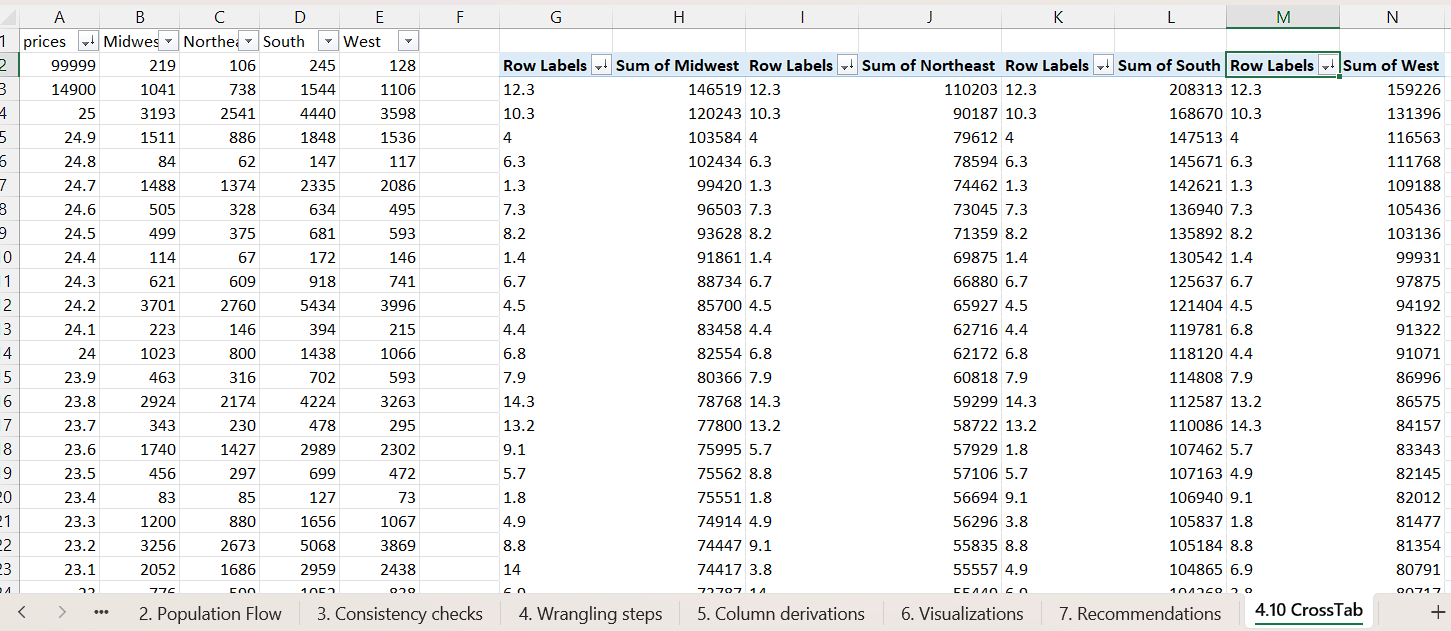

Based on the crosstabbing analysis, I can check to see what are the most often priced items across all 4 regions, and noticed that each region has similar pricing for majority of orders. Through this I can see there is not much difference in spending and region.

# Creating exclusion flag and removing customers with less than 5 orders

In [13]:
ords_prods_customer['order_sum'] = ords_prods_customer.groupby(['user_id'])['order_number'].transform(np.max)

C:\Users\Akira\AppData\Local\Temp\ipykernel_19552\3060702755.py:1: FutureWarning: The provided callable <function amax at 0x0000027574DC1B20> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  ords_prods_customer['order_sum'] = ords_prods_customer.groupby(['user_id'])['order_number'].transform(np.max)


In [14]:
ords_prods_customer.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,Surnam,gender,STATE,age,date_joined,num_of_dependants,marital_status,income,Region,order_sum
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,10
1,2398795,1,2,3,7,15.000000,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,10
2,473747,1,3,3,12,21.000000,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,10
3,2254736,1,4,4,7,29.000000,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,10
4,431534,1,5,4,15,28.000000,196,1,1,both,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,10


In [15]:
# loc function to create exclusion flag
ords_prods_customer.loc[ords_prods_customer['order_sum'] > 5, 'exclusion_flag'] = 'High Activity'

C:\Users\Akira\AppData\Local\Temp\ipykernel_19552\367761898.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'High Activity' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_customer.loc[ords_prods_customer['order_sum'] > 5, 'exclusion_flag'] = 'High Activity'


In [16]:
ords_prods_customer.loc[ords_prods_customer['order_sum'] < 5, 'exclusion_flag'] = 'Low Activity'

In [17]:
ords_prods_customer.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,STATE,age,date_joined,num_of_dependants,marital_status,income,Region,order_sum,exclusion_flag
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
1,2398795,1,2,3,7,15.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
2,473747,1,3,3,12,21.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
3,2254736,1,4,4,7,29.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
4,431534,1,5,4,15,28.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity


In [18]:
#checking value counts
ords_prods_customer['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
High Activity    30171424
Low Activity      1440295
NaN                793140
Name: count, dtype: int64

In [19]:
# Dropping Low Activity Rows
ords_prods_customer_high = ords_prods_customer.drop(ords_prods_customer[ords_prods_customer['exclusion_flag'] == 'Low Activity'].index)

In [20]:
# Confirming dropped rows
ords_prods_customer_high['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
High Activity    30171424
NaN                793140
Name: count, dtype: int64

In [21]:
ords_prods_customer_high.shape

(30964564, 36)

# Customer Profiling 

In [22]:
ords_prods_customer_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,gender,STATE,age,date_joined,num_of_dependants,marital_status,income,Region,order_sum,exclusion_flag
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
1,2398795,1,2,3,7,15.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
2,473747,1,3,3,12,21.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
3,2254736,1,4,4,7,29.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity
4,431534,1,5,4,15,28.000000,196,1,1,both,...,Female,Alabama,31,2/17/2019,3,married,40423,South,10,High Activity


In [23]:
ords_prods_customer_high.dtypes

order_id                            int64
user_id                             int64
order_number                        int64
orders_day_of_week                  int64
order_hour_of_day                   int64
days_since_prior_order            float64
product_id                          int64
add_to_cart_order                   int64
reordered                           int64
_merge                           category
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
price_range_loc                    object
busiest_day                        object
busiest_days                       object
busiest_period_of_day              object
max_order                           int64
loyalty_flag                       object
average_price                     float64
spending_flag                      object
median_days_since_prior_order     float64
frequency_flag                    

## Creating age group column based on age

In [25]:
# loc function to create age group flag
ords_prods_customer_high.loc[(ords_prods_customer_high['age'] <= 65) & (ords_prods_customer_high['age'] > 18), 'age_group_flag'] = 'Adult'

C:\Users\Akira\AppData\Local\Temp\ipykernel_19552\1707933031.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Adult' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_customer_high.loc[(ords_prods_customer_high['age'] <= 65) & (ords_prods_customer_high['age'] > 18), 'age_group_flag'] = 'Adult'


In [26]:
ords_prods_customer_high.loc[(ords_prods_customer_high['age'] <= 18) , 'age_group_flag'] = 'Adolescent'

In [27]:
ords_prods_customer_high.loc[(ords_prods_customer_high['age'] > 65) , 'age_group_flag'] = 'Elderly'

In [28]:
#checking value counts
ords_prods_customer_high['age_group_flag'].value_counts(dropna = False)

age_group_flag
Adult         22755273
Elderly        7730834
Adolescent      478457
Name: count, dtype: int64

# Creating Income Class Flag based on Customer Income

In [42]:
# loc function to create age group flag
ords_prods_customer_high.loc[(ords_prods_customer_high['income'] <= 100000) & (ords_prods_customer_high['income'] > 40000), 'income_group_flag'] = 'Middle Class' 

In [30]:
ords_prods_customer_high.loc[(ords_prods_customer_high['income'] <= 40000) , 'income_group_flag'] = 'Lower Class' 

In [31]:
ords_prods_customer_high.loc[(ords_prods_customer_high['income'] > 100000) , 'income_group_flag'] = 'Upper Class' 

In [32]:
#checking value counts
ords_prods_customer_high['income_group_flag'].value_counts(dropna = False)

income_group_flag
Middle Class    15145511
Upper Class     14207028
Lower Class      1612025
Name: count, dtype: int64

# Creating Department Items column 

In [33]:
# Create new result in-loop function with updated changes
department_item = []

for department_id in ords_prods_customer_high["department_id"]:
    if department_id == 1:
        department_item.append("Frozen")
    elif department_id == 2:
        department_item.append("other")
    elif department_id == 3:
        department_item.append("bakery")
    elif department_id == 4:
        department_item.append("produce")
    elif department_id == 5:
        department_item.append("alcohol")
    elif department_id == 6:
        department_item.append("international")
    elif department_id == 7:
        department_item.append("beverages")
    elif department_id == 8:
        department_item.append("pets")
    elif department_id == 9:
        department_item.append("dry goods pasta")
    elif department_id == 10:
        department_item.append("bulk")
    elif department_id == 11:
        department_item.append("personal care")
    elif department_id == 12:
        department_item.append("meat seafood")
    elif department_id == 13:
        department_item.append("pantry")
    elif department_id == 14:
        department_item.append("breakfast")
    elif department_id == 15:
        department_item.append("canned goods")
    elif department_id == 16:
        department_item.append("dairy eggs")
    elif department_id == 17:
        department_item.append("household")
    elif department_id == 18:
        department_item.append("babies")
    elif department_id == 19:
        department_item.append("snacks")
    elif department_id == 20:
        department_item.append("deli")
    elif department_id == 21:
        department_item.append("missing")
    else:
        department_item.append("Unknown")

In [34]:
department_item

['beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'dairy eggs',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'household',
 'household',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'produce',
 'produce',
 'breakfast',
 'breakfast',
 'breakfast',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'dairy eggs',
 'pantry',
 'produce',
 'produce',
 'produce',
 'beverages',
 'beverages',
 'beverages',
 'dairy eggs',
 'dairy eggs',
 'snacks',
 'dairy eggs',
 'dairy eggs',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'beverages',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'snacks',
 'sna

In [35]:
ords_prods_customer_high['department_item'] = department_item

In [36]:
#checking value counts
ords_prods_customer_high['department_item'].value_counts(dropna = False)

department_item
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
Frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

# Creating Family Flag from number of dependents

In [37]:
# loc function to create age group flag
ords_prods_customer_high.loc[(ords_prods_customer_high['num_of_dependants'] <= 2) & (ords_prods_customer_high['num_of_dependants'] > 0), 'family_flag'] = 'Nuclear Family' 

C:\Users\Akira\AppData\Local\Temp\ipykernel_19552\1082310192.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Nuclear Family' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ords_prods_customer_high.loc[(ords_prods_customer_high['num_of_dependants'] <= 2) & (ords_prods_customer_high['num_of_dependants'] > 0), 'family_flag'] = 'Nuclear Family'


In [38]:
ords_prods_customer_high.loc[(ords_prods_customer_high['num_of_dependants'] == 0), 'family_flag'] = 'No Kids' 

In [39]:
ords_prods_customer_high.loc[(ords_prods_customer_high['num_of_dependants'] > 2), 'family_flag'] = 'Big Family' 

In [40]:
#checking value counts
ords_prods_customer_high['family_flag'].value_counts(dropna = False)

family_flag
Nuclear Family    15452367
Big Family         7772516
No Kids            7739681
Name: count, dtype: int64

# Customer Profile Visualization

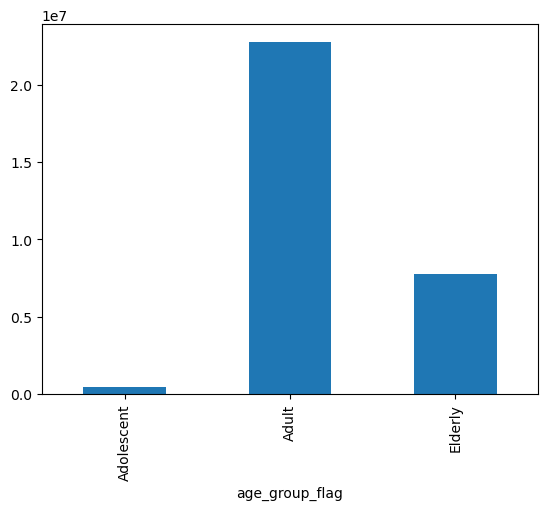

In [41]:
# Age Group Flag Visualization
age_bar = ords_prods_customer_high['age_group_flag'].value_counts().sort_index().plot.bar()

In [73]:
#exporting age_bar
age_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'age_group_barchart.png'))

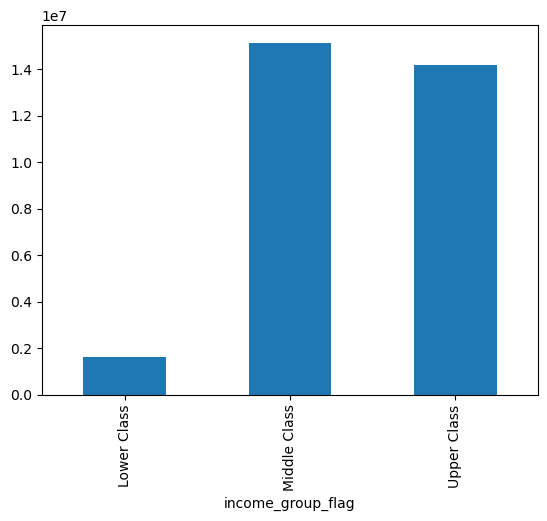

In [44]:
# Income Group Flag Visualization
income_bar = ords_prods_customer_high['income_group_flag'].value_counts().sort_index().plot.bar()

In [74]:
#exporting income_bar
income_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_group_barchart.png'))

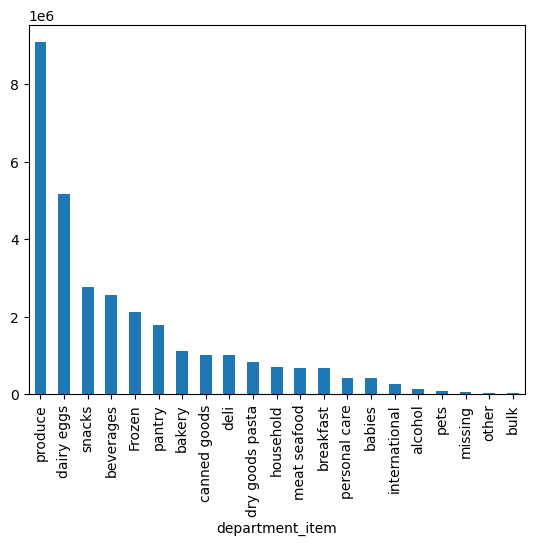

In [46]:
#Department Item Visualization

department_bar = ords_prods_customer_high['department_item'].value_counts().plot.bar()

In [75]:
#exporting department_bar
department_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'department_group_barchart.png'))

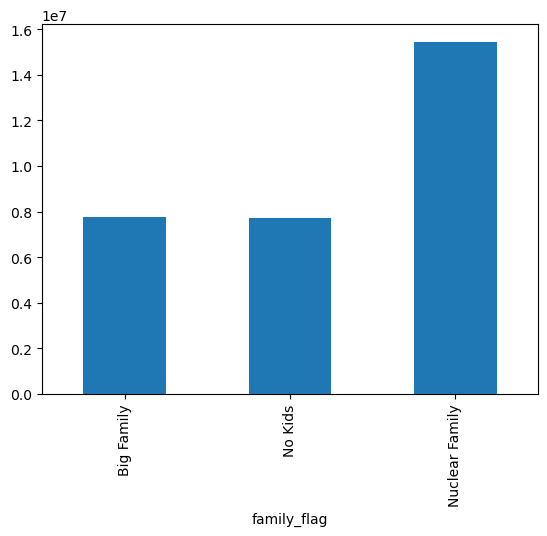

In [47]:
# Family Flag Visualization
family_bar = ords_prods_customer_high['family_flag'].value_counts().sort_index().plot.bar()

In [76]:
#exporting family_bar
family_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'family_group_barchart.png'))

The nuclear family represents users with 2 kids; anything larger would be considered a big family

# Customer Profile Description

In [54]:
# profile on order_sum column
ords_prods_customer_high.groupby('order_sum').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                  mean min max
order_sum                     
5             3.011444   1   5
6             3.512476   1   6
7             4.015896   1   7
8             4.529198   1   8
9             5.026440   1   9
...                ...  ..  ..
95           48.304808   1  95
96           48.983289   1  96
97           49.654408   1  97
98           49.920896   1  98
99           49.509214   1  99

[95 rows x 3 columns]

In [55]:
# profile of department items
ords_prods_customer_high.groupby('department_item').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                        mean min max
department_item                     
Frozen             16.160739   1  99
alcohol            16.034226   1  99
babies             19.867090   1  99
bakery             17.856619   1  99
beverages          17.901479   1  99
breakfast          17.469987   1  99
bulk               20.797555   1  99
canned goods       16.933858   1  99
dairy eggs         18.324695   1  99
deli               17.144802   1  99
dry goods pasta    16.633019   1  99
household          16.438914   1  99
international      17.174694   1  99
meat seafood       16.576910   1  99
missing            24.281327   1  99
other              18.096481   1  99
pantry             17.328319   1  99
personal care      16.933392   1  99
pets               15.995927   1  99
produce            18.495730   1  99
snacks             17.830354   1  99

# Cross Examining Customer Profile with Region Information

In [56]:
ords_prods_customer_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,num_of_dependants,marital_status,income,Region,order_sum,exclusion_flag,age_group_flag,income_group_flag,department_item,family_flag
0,2539329,1,1,2,8,11.114836,196,1,0,both,...,3,married,40423,South,10,High Activity,Adult,Middle Class,beverages,Big Family
1,2398795,1,2,3,7,15.000000,196,1,1,both,...,3,married,40423,South,10,High Activity,Adult,Middle Class,beverages,Big Family
2,473747,1,3,3,12,21.000000,196,1,1,both,...,3,married,40423,South,10,High Activity,Adult,Middle Class,beverages,Big Family
3,2254736,1,4,4,7,29.000000,196,1,1,both,...,3,married,40423,South,10,High Activity,Adult,Middle Class,beverages,Big Family
4,431534,1,5,4,15,28.000000,196,1,1,both,...,3,married,40423,South,10,High Activity,Adult,Middle Class,beverages,Big Family


### Examining Region and Income

In [60]:
crosstab = pd.crosstab(ords_prods_customer_high['income_group_flag'], ords_prods_customer_high['Region'], dropna = False)

In [61]:
crosstab.to_clipboard()

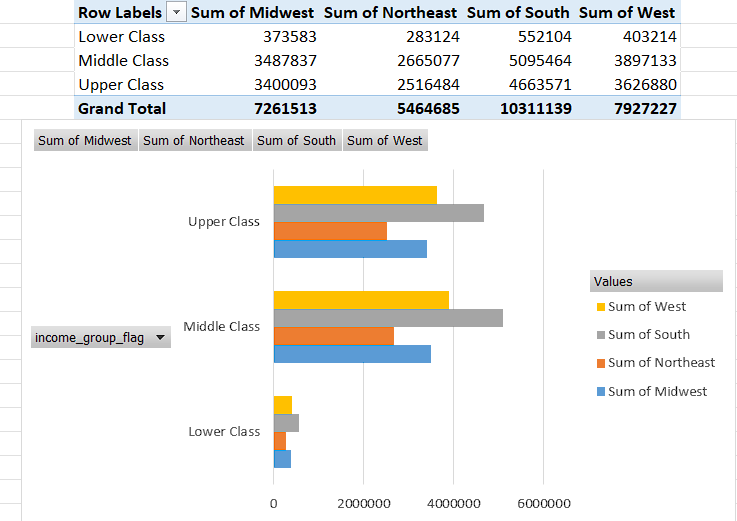

Based on the cross tab visualization, there is a consistent hierarchy of income levels. The South region contains 33% of total customer base, so it makes sense of how it dominates each income group level. An interesting perspective is the West region, which only contains 25.6% of total customer base. It holds strong at the send most in middle and high income groups. A region to work on improvements would be the Northeast, only holding 17.65% of total customer base and falling last in each category

### Examining Region and Department Item

In [62]:
crosstab = pd.crosstab(ords_prods_customer_high['department_item'], ords_prods_customer_high['Region'], dropna = False)

In [63]:
crosstab.to_clipboard()

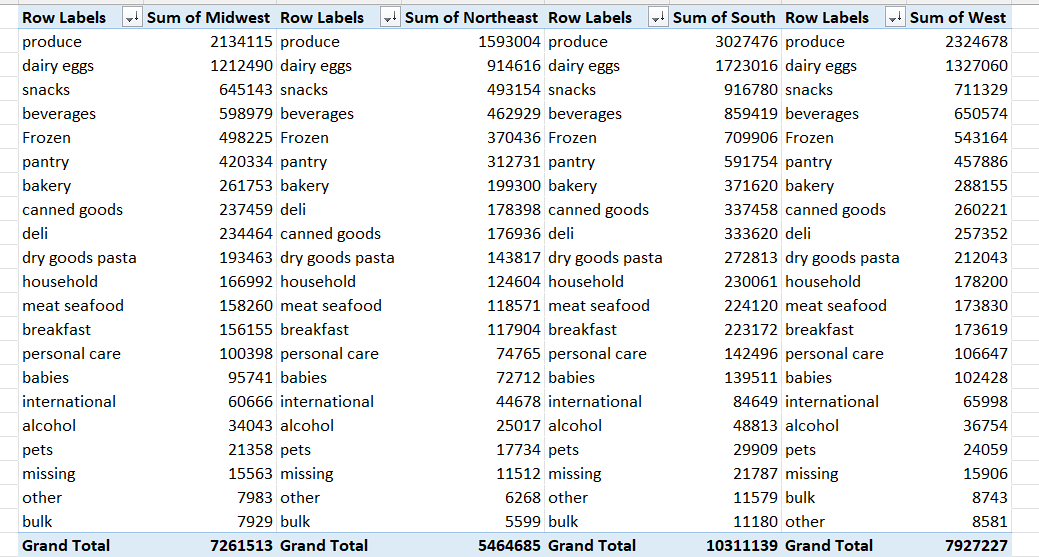

In this visualization looking at region and department, there is a consistent top items ordered amongst each region. The top items: produce, dairy eggs, snacks, beverages, frozen, pantry, etc., is very reflective of the amount of users with multiple children. These items are necessary for a healthy diet and is the most common amongst US kitchens.

### Examining Region and Family Flag


In [64]:
crosstab = pd.crosstab(ords_prods_customer_high['family_flag'], ords_prods_customer_high['Region'], dropna = False)

In [65]:
crosstab.to_clipboard()

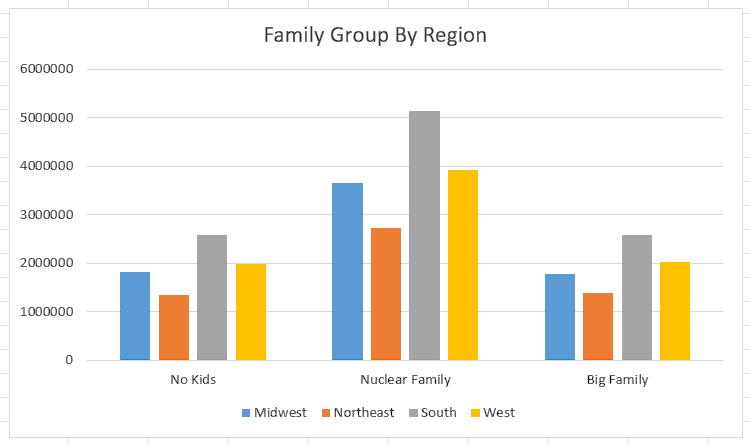

In this visualization between Region and Family_flag, it follows the same distribution as region and income level, which makes sense in the fact that those who have higher incomes have the ability to raise multiple children and have resources to afford instacart.

### Examining Department Item and Age-Group_flag


In [66]:
crosstab = pd.crosstab(ords_prods_customer_high['department_item'], ords_prods_customer_high['age_group_flag'], dropna = False)

In [67]:
crosstab.to_clipboard()

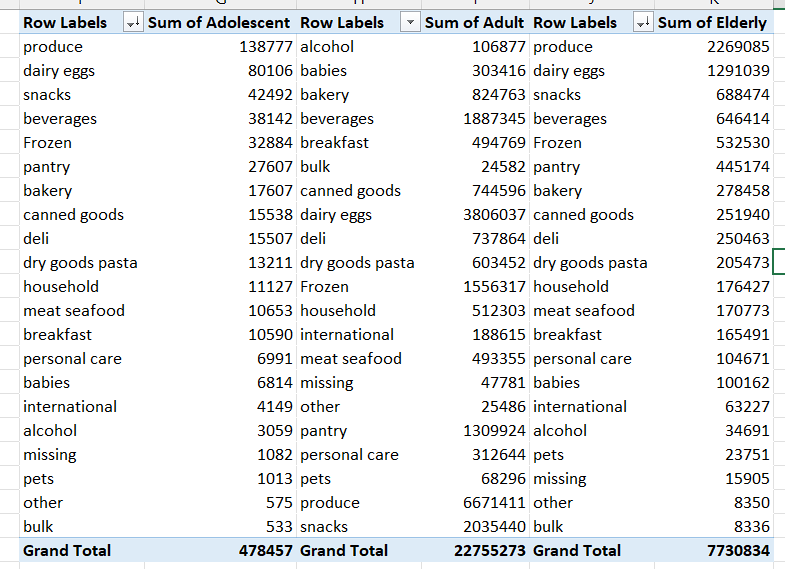


All of the items each age group purchases is consistent as the region amongst customers. 

### Examining Department Item and Income-Group_flag


In [69]:
crosstab = pd.crosstab(ords_prods_customer_high['department_item'], ords_prods_customer_high['income_group_flag'], dropna = False)

In [70]:
crosstab.to_clipboard()

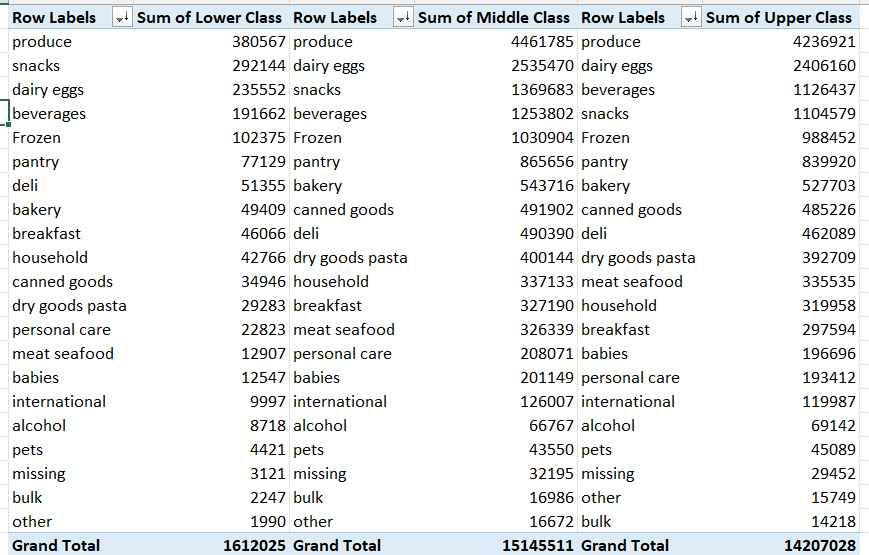

An interesting observation of this visualization is that amongst the lower class income group, snacks fall 2nd in the top ranking, compared to the other classes of snacks falling in 3rd. This may be because snacks are a cheaper item to afford that most kids enjoy.

### Examining Department Item and Family_flag


In [71]:
crosstab = pd.crosstab(ords_prods_customer_high['department_item'], ords_prods_customer_high['family_flag'], dropna = False)

In [72]:
crosstab.to_clipboard()

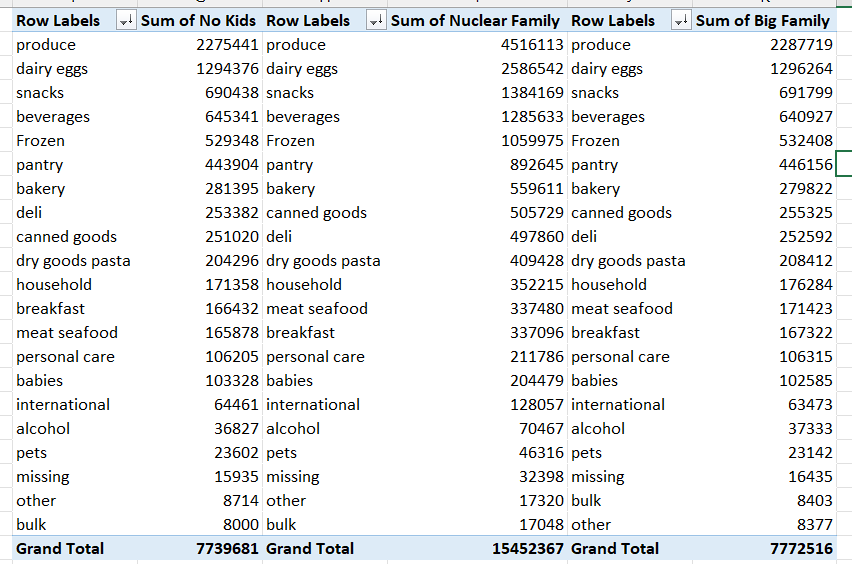


Looking at this visualization, I came to a conclusion about the instacart demographic. The customer base varies widely in ages, income, and family situation. However, what the customers order is very consistent. Instacart customers care about their health and diet, and they utilize instacart to provide consistent healthy ingredients so it makes their everyday life better.

# Exporting final dataframe


In [77]:
ords_prods_customer_high.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'FINAL_ords_prods_customer.pkl'))